# CLUSTERING

In [14]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.graph_objects as go




from collections import defaultdict
from scipy.stats.stats import pearsonr
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [15]:
df = pd.read_csv('training_cleaned.csv')
df.drop(df.columns[0], axis=1, inplace=True)
df.head()

RefId  IsBadBuy   PurchDate  Auction  VehYear  VehicleAge      Make  \
0    326         1  10/25/2010    ADESA     2008           2       KIA   
1  42991         0   5/27/2009  MANHEIM     2006           3     DODGE   
2  55273         0   3/18/2010    OTHER     2008           2     DODGE   
3  29058         0    6/8/2009    OTHER     2005           4      FORD   
4  34991         0    3/4/2009  MANHEIM     2005           4  CHRYSLER   

                  Model SubModel   Color  ...     CRCP  BYRNO  VNZIP1 VNST  \
0               SPECTRA   MEDIUM    BLUE  ...  10650.0   5546   33619   FL   
1  STRATUS V6 2.7L V6 M   MEDIUM  SILVER  ...   7478.0  99750   32124   FL   
2               CALIBER   MEDIUM   BLACK  ...  11350.0  99761   74135   OK   
3  FREESTAR FWD V6 3.9L      VAN   BROWN  ...   7691.0  99761   85018   AZ   
4  TOWN & COUNTRY FWD V      VAN    BLUE  ...   7856.0  20833   75236   TX   

  VehBCost IsOnlineSale  WarrantyCost  WheelTypeIDDelete  Region  IsBase  
0   6100.0            0           533                2.0     SAT      NO  
1   4000.0            0          1630                2.0     SAT      NO  
2   7500.0            0           693                2.0     WSC      NO  
3   4725.0            0          1633                2.0     MNT      NO  
4   5670.0            0          1623                1.0     WSC     YES  

[5 rows x 33 columns]

In [16]:
df_clus = df.drop(columns=['RefId',
        'PurchDate',
        'IsBadBuy',
        'Auction',
        'Make',
        'Model',
        'WheelTypeID',
        'Nationality',
        'Size',
        'Color',
        'Transmission',
        'BYRNO',
        'VNST',
        'TopThreeAmericanName',
        'SubModel',
        'VehYear',
        'VNZIP1',
        'VehicleAge',
        'IsOnlineSale',
        'Region',
                           
        #da eliminare 
        'WheelTypeIDDelete',
        
        'IsBase',])
df_clus.dropna(inplace=True)
len(df_clus)
df_clus.head()

VehOdo    AAAP    AACP     ARAP     ARCP    CAAP    CACP     CRAP     CRCP  \
0   61184  6796.0  7555.0  10140.0  10805.0  6628.0  7535.0   9605.0  10650.0   
1   92383  5480.0  6461.0   6418.0   7478.0  5480.0  6461.0   6418.0   7478.0   
2   45965  8067.0  8580.0  11073.0  11652.0  7497.0  8102.0  10721.0  11350.0   
3   80169  4817.0  6658.0   5702.0   7691.0  4817.0  6658.0   5702.0   7691.0   
4   77372  5430.0  6633.0   6364.0   7664.0  5370.0  6811.0   6300.0   7856.0   

   VehBCost  WarrantyCost  
0    6100.0           533  
1    4000.0          1630  
2    7500.0           693  
3    4725.0          1633  
4    5670.0          1623

## K-Means with Z-Score

In [17]:
scaler = StandardScaler()
z_df_clus = scaler.fit_transform(df_clus.values)

In [18]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [29]:
kmeans = KMeans(n_clusters=5, n_init=50, max_iter=500)
kmeans.fit(z_df_clus)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=5, n_init=50, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

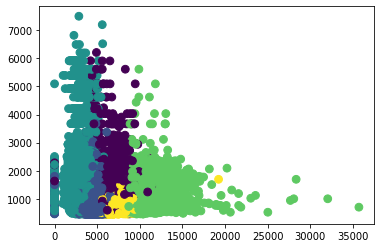

In [30]:
plt.scatter(df_clus['AAAP'], df_clus['WarrantyCost'], 
            c=kmeans.labels_, s=60)

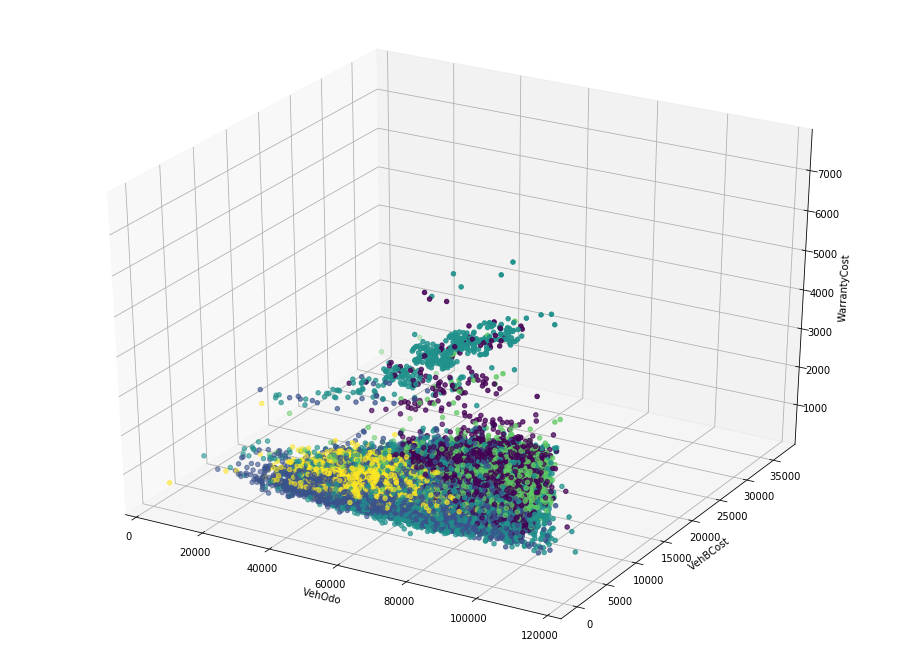

In [31]:
x = 'VehOdo'
y = 'VehBCost'
z = 'WarrantyCost'

fig = plt.figure(figsize=(16,12))
ax = fig.gca(projection='3d')
ax.scatter(df_clus[x],
           df_clus[y],
           df_clus[z],
           c=kmeans.labels_, marker='o')
ax.set_xlabel(x)
ax.set_ylabel(y)
ax.set_zlabel(z)
plt.show()

In [36]:
fig = go.Figure(data=[go.Scatter3d(
    x=df_clus[x],
    y=df_clus[y],
    z=df_clus[z],
    mode='markers',
    marker=dict(
        size=2,
        color=kmeans.labels_,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

## K-Means with MinMax

In [42]:
scaler = MinMaxScaler()
minmax_df_clus = scaler.fit_transform(df_clus.values)

In [43]:
kmeans_2 = KMeans(n_clusters=5, n_init=50, max_iter=500)
kmeans_2.fit(minmax_df_clus)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=500,
       n_clusters=5, n_init=50, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

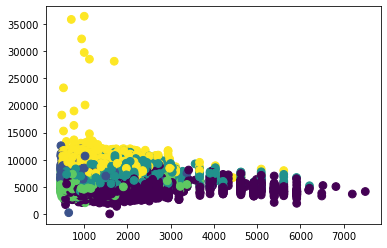

In [44]:
plt.scatter(df_clus['WarrantyCost'], df_clus['VehBCost'], 
            c=kmeans_2.labels_, s=60)

## DBSCAN

from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(x_)

plt.scatter(df_['WarrantyCost'], df_['VehBCost'], 
            c=dbscan.labels_, s=20)
plt.tick_params(axis='both', which='major')
plt.show()

## Hierarchical Clustering

In [45]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

In [46]:
df_clus.columns

Index(['VehOdo', 'AAAP', 'AACP', 'ARAP', 'ARCP', 'CAAP', 'CACP', 'CRAP',
       'CRCP', 'VehBCost', 'WarrantyCost'],
      dtype='object')

Eliminate alcune colonne + ridotto il dataset a 1000 righe

In [47]:
df_h = df_clus[['WarrantyCost','VehBCost','VehOdo']]
df_h = df_h[0:5000]

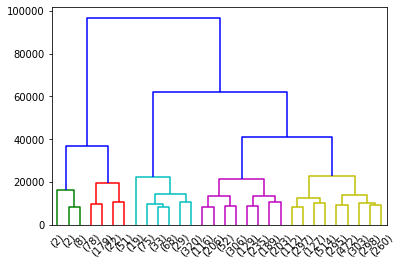

In [53]:
data_dist = pdist(df_h, metric='euclidean')
data_link = linkage(data_dist, method='complete', metric='euclidean')
res = dendrogram(data_link, color_threshold=25000, truncate_mode='lastp')